# Flight Price Prediction 
**OBJECTIVE:**
* Predict flight ticket prices based on date, destination, and other factors. 

**DATA COLLECTION:**
* Data is collected from Kaggle: Flight Price Prediction uploaded by Shubham Bathwal.

In [334]:
#imported necessary library function and datasets for this project 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv('Clean_Dataset.csv')

In [335]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [336]:
#to ignore the warnings

import warnings
warnings.filterwarnings('ignore')

# DATA CLEANING

In [337]:
df.info()
df.head()

#no missing values found and datatypes are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**duplicates**

In [338]:
df.duplicated().sum()
#no duplicate values

np.int64(0)

**renaming columns**

In [339]:
df.rename(columns={'Unnamed: 0':'Index'},inplace=True)

**converting duration into minutes**

In [340]:
# Convert decimal hours to total minutes
df['duration_converted'] = (df['duration'] * 60).astype(int)

# Display result
print(df[['duration_converted', 'duration']].head())


   duration_converted  duration
0                 130      2.17
1                 139      2.33
2                 130      2.17
3                 135      2.25
4                 139      2.33


In [341]:
df.drop(['duration'],axis=1,inplace=True)

In [342]:
df.rename(columns={'duration_converted':'duration'},inplace=True)

In [343]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

In [344]:
df.head()

,Index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,130
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,139
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,130
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,135
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,139


**checking outliers**

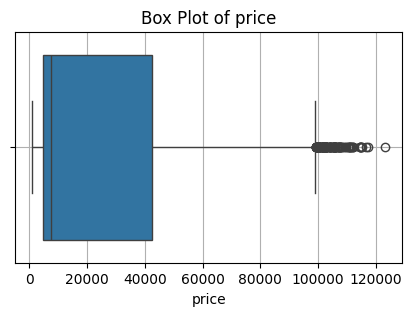

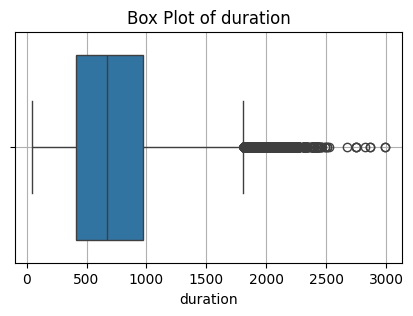

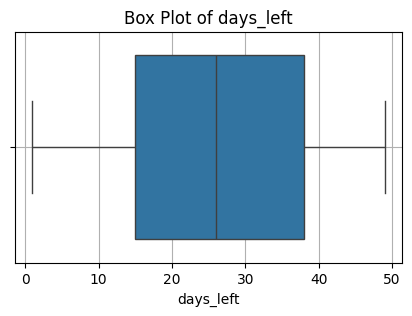

In [345]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid()
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.xlabel('duration')
plt.grid()
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['days_left'])
plt.title('Box Plot of days_left')
plt.xlabel('days_left')
plt.grid()
plt.show()

**handling outliers**
- which approach should be followed?


In [346]:
# Step 1: Identify outliers using IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds (values outside 1.5 * IQR are outliers)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Apply log transformation on outliers
# Only apply the log transformation to values outside the bounds
df['price'] = df['price'].apply(lambda x: np.log(x) if x < lower_bound or x > upper_bound else x)

# Print transformed data
print("\nLog Transformed Data:\n", df['price'])


Log Transformed Data:
 0          5953.0
1          5953.0
2          5956.0
3          5955.0
4          5955.0
           ...   
300148    69265.0
300149    77105.0
300150    79099.0
300151    81585.0
300152    81585.0
Name: price, Length: 300153, dtype: float64


In [347]:
# Step 1: Identify outliers using IQR (Interquartile Range)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds (values outside 1.5 * IQR are outliers)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Cap the outliers
df['duration'] = df['duration'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

# Print after capping outliers

print("\nData after capping outliers:\n", df['duration'])


Data after capping outliers:
 0         130.0
1         139.0
2         130.0
3         135.0
4         139.0
          ...  
300148    604.0
300149    625.0
300150    829.0
300151    600.0
300152    604.0
Name: duration, Length: 300153, dtype: float64


**after removal of outlier**

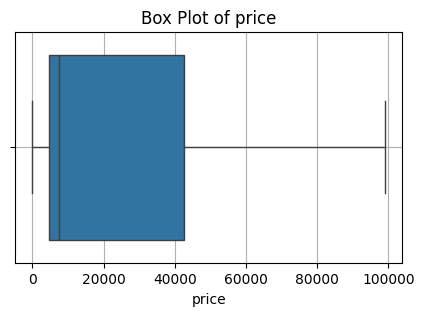

In [348]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid()
plt.show()

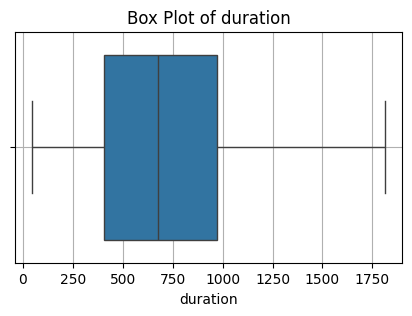

In [349]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.xlabel('duration')
plt.grid()
plt.show()

In [350]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

**checking uniqueness**

In [351]:
df.nunique()

Index               300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
days_left               49
price                12157
duration               356
dtype: int64

In [352]:
df.dtypes

Index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
days_left             int64
price               float64
duration            float64
dtype: object

**label encoding for categorical values**

In [353]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categorical_columns = ['airline','flight','source_city', 'destination_city', 'stops', 'departure_time', 'arrival_time', 'class']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Print the DataFrame with encoded categorical columns
df.head()

,Index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,4,1408,2,2,2,5,5,1,1,5953.0,130.0
1,1,4,1387,2,1,2,4,5,1,1,5953.0,139.0
2,2,0,1213,2,1,2,1,5,1,1,5956.0,130.0
3,3,5,1559,2,4,2,0,5,1,1,5955.0,135.0
4,4,5,1549,2,4,2,4,5,1,1,5955.0,139.0


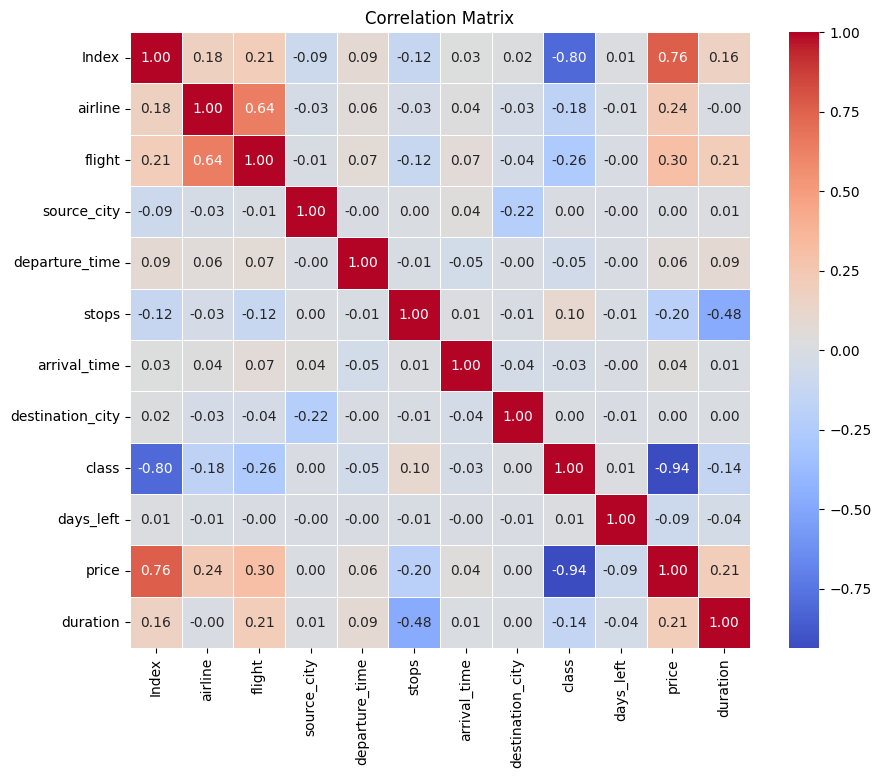

In [354]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix with respect to the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



since flight has 1500 categorical values and encoding it is difficult plus its relation with output feature is moderate, so we drop this column

In [355]:
df.drop(['flight'],axis=1,inplace=True)

In [356]:
df.columns

Index(['Index', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

q. when normalize and when standardize?

In [357]:
from sklearn.preprocessing import StandardScaler
# standardscaler and z-score normalization is same, here range isnt always 0-1

columns_to_scale = ['duration', 'price', 'days_left']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nScaled DataFrame:")
print(df)


Scaled DataFrame:
         Index  airline  source_city  departure_time  stops  arrival_time  \
0            0        4            2               2      2             5   
1            1        4            2               1      2             4   
2            2        0            2               1      2             1   
3            3        5            2               4      2             0   
4            4        5            2               4      2             4   
...        ...      ...          ...             ...    ...           ...   
300148  300148        5            1               4      0             2   
300149  300149        5            1               0      0             5   
300150  300150        5            1               1      0             5   
300151  300151        5            1               1      0             2   
300152  300152        5            1               4      0             2   

        destination_city  class  days_left     price  du

**unique value check garim**

In [358]:
df.nunique()

Index               300153
airline                  6
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
days_left               49
price                12157
duration               356
dtype: int64

In [359]:
df.dtypes

Index                 int64
airline               int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
days_left           float64
price               float64
duration            float64
dtype: object

In [360]:
df.head()

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,4,2,2,2,5,5,1,-1.843875,-0.657910,-1.406130
1,1,4,2,1,2,4,5,1,-1.843875,-0.657910,-1.385097
2,2,0,2,1,2,1,5,1,-1.843875,-0.657777,-1.406130
3,3,5,2,4,2,0,5,1,-1.843875,-0.657822,-1.394445
4,4,5,2,4,2,4,5,1,-1.843875,-0.657822,-1.385097


In [361]:
#encoded values into new csv file named "cleaned.csv"
df.to_csv("cleaned.csv", index=False)

In [362]:
# now cleaned.csv acts as a dataframe
df=pd.read_csv('cleaned.csv')
df.head()

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,4,2,2,2,5,5,1,-1.843875,-0.657910,-1.406130
1,1,4,2,1,2,4,5,1,-1.843875,-0.657910,-1.385097
2,2,0,2,1,2,1,5,1,-1.843875,-0.657777,-1.406130
3,3,5,2,4,2,0,5,1,-1.843875,-0.657822,-1.394445
4,4,5,2,4,2,4,5,1,-1.843875,-0.657822,-1.385097


# EDA

In [363]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [364]:
df.columns

Index(['Index', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

**graph plotting between numeric and categorical features**

In [366]:
import pandas as pd

# Assuming 'df' is your DataFrame
departure_time_encoded = df['departure_time']
airline_encoded = df['airline']

# Compute correlation
correlation = departure_time_encoded.corr(airline_encoded)
print("Correlation:", correlation)


Correlation: 0.05688469375831181


In [367]:
df.head()

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,4,2,2,2,5,5,1,-1.843875,-0.657910,-1.406130
1,1,4,2,1,2,4,5,1,-1.843875,-0.657910,-1.385097
2,2,0,2,1,2,1,5,1,-1.843875,-0.657777,-1.406130
3,3,5,2,4,2,0,5,1,-1.843875,-0.657822,-1.394445
4,4,5,2,4,2,4,5,1,-1.843875,-0.657822,-1.385097


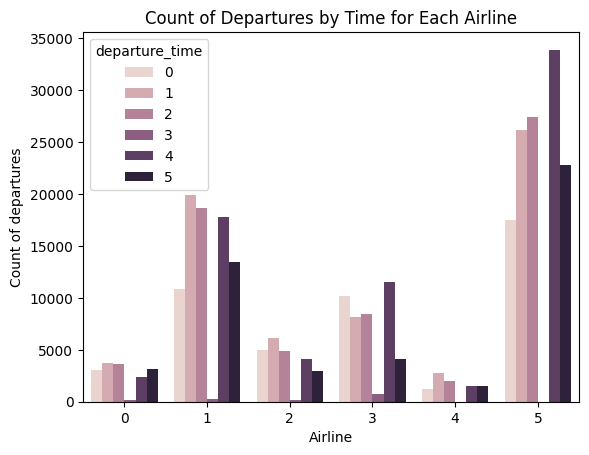

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot (count plot) showing the count of departures by time for each airline
sns.countplot(x='airline', hue='departure_time', data=df)

plt.xlabel('Airline')
plt.ylabel('Count of departures')
plt.title('Count of Departures by Time for Each Airline')   
plt.show()


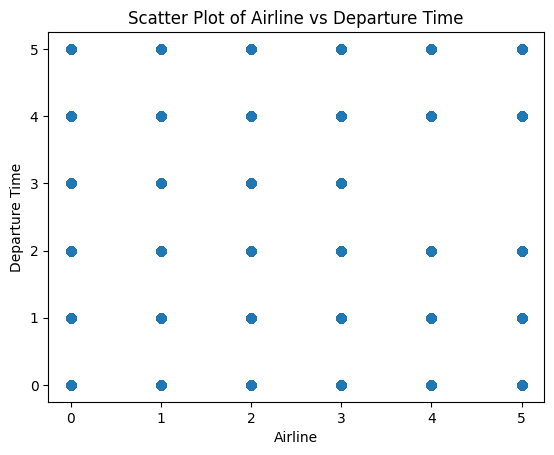

In [369]:
plt.scatter(df['airline'], df['departure_time'], alpha=0.5)

plt.xlabel('Airline')
plt.ylabel('Departure Time')
plt.title('Scatter Plot of Airline vs Departure Time')
plt.show()


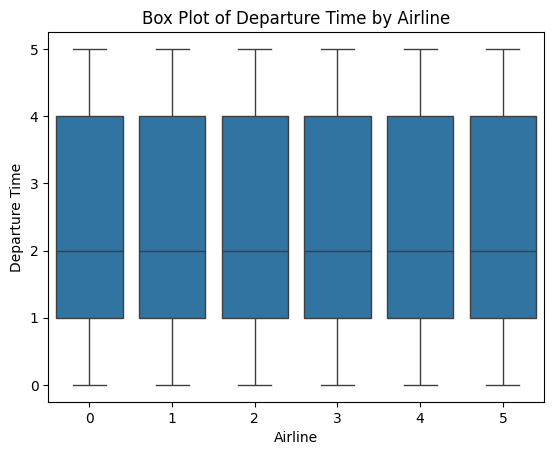

In [370]:
sns.boxplot(x='airline', y='departure_time', data=df)

plt.xlabel('Airline')
plt.ylabel('Departure Time')
plt.title('Box Plot of Departure Time by Airline')
plt.show()


In [371]:
df.columns

Index(['Index', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

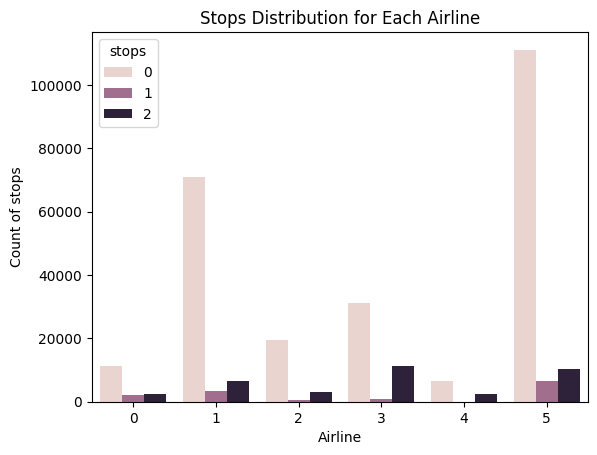

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot (count plot) showing the count of departures by time for each airline
sns.countplot(x='airline', hue='stops', data=df)

plt.xlabel('Airline')
plt.ylabel('Count of stops')
plt.title('Stops Distribution for Each Airline')
plt.show()


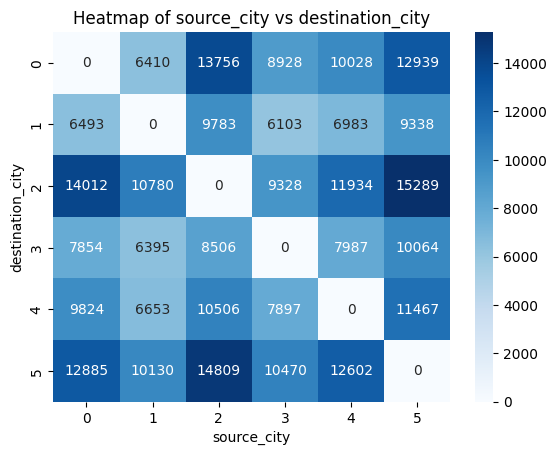

In [373]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
crosstab = pd.crosstab(df['source_city'], df['destination_city'])

# Plot heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of source_city vs destination_city')
plt.xlabel('source_city')
plt.ylabel('destination_city')
plt.show()



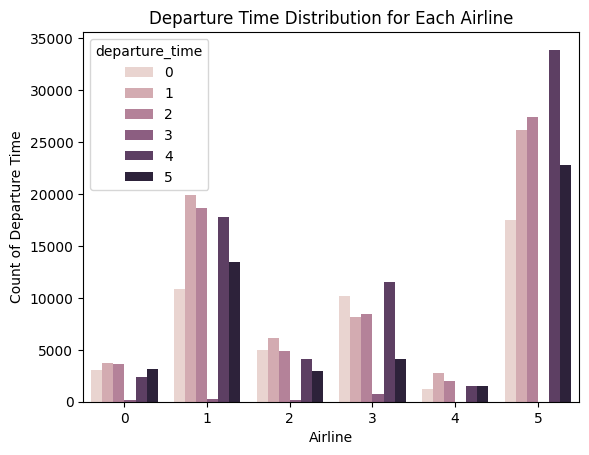

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot (count plot) showing the count of departures by time for each airline
sns.countplot(x='airline', hue='departure_time', data=df)

plt.xlabel('Airline')
plt.ylabel('Count of Departure Time')
plt.title('Departure Time Distribution for Each Airline')
plt.show()
